In [21]:
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
stock = '^NSEBANK'#NIFTYBANK
data  = web.DataReader(stock, data_source='yahoo', start='01-01-2014')

In [6]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-06,26853.449219,26135.300781,26274.099609,26798.949219,0.0,26798.949219
2020-11-09,27595.000000,27068.949219,27088.949219,27534.099609,0.0,27534.099609
2020-11-10,28802.500000,27916.900391,28039.449219,28606.000000,0.0,28606.000000
2020-11-11,29030.900391,28211.099609,28713.150391,28845.000000,0.0,28845.000000
2020-11-12,28672.900391,28066.050781,28633.750000,28256.250000,0.0,28256.250000


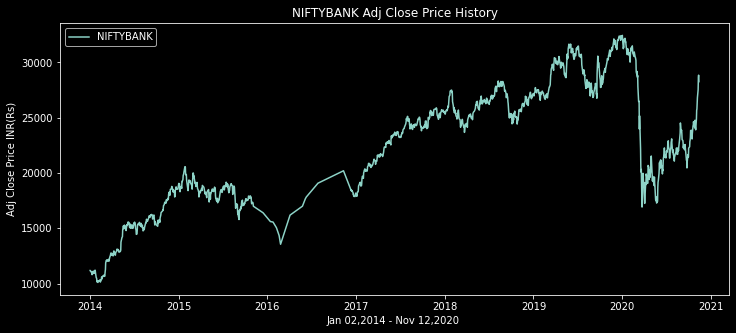

In [12]:
plt.figure(figsize=(12, 5))
plt.plot(data['Adj Close'], label='NIFTYBANK')
plt.title('NIFTYBANK Adj Close Price History')
plt.xlabel("Jan 02,2014 - Nov 12,2020 ")
plt.ylabel("Adj Close Price INR(Rs)")
plt.legend(loc="upper left")
plt.style.use('dark_background') 
plt.show()

In [15]:
sma30 = pd.DataFrame()
sma30['Adj Close'] = data['Adj Close'].rolling(window=30).mean()
sma30

,Adj Close
Date,
2014-01-02,NaN
2014-01-03,NaN
2014-01-06,NaN
2014-01-07,NaN
2014-01-08,NaN
...,...
2020-11-06,23779.173438
2020-11-09,23997.565104
2020-11-10,24228.915104


In [16]:
sma100 = pd.DataFrame()
sma100['Adj Close'] = data['Adj Close'].rolling(window=100).mean()
sma100

,Adj Close
Date,
2014-01-02,NaN
2014-01-03,NaN
2014-01-06,NaN
2014-01-07,NaN
2014-01-08,NaN
...,...
2020-11-06,22680.523496
2020-11-09,22742.483496
2020-11-10,22811.460000


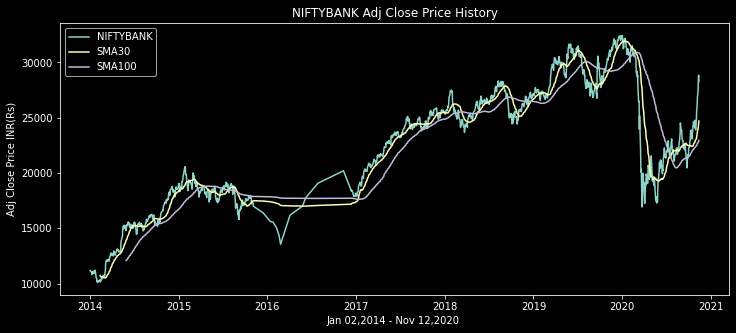

In [17]:
plt.figure(figsize=(12, 5))
plt.plot(data['Adj Close'], label='NIFTYBANK')
plt.plot(sma30['Adj Close'], label='SMA30')
plt.plot(sma100['Adj Close'], label='SMA100')
plt.title('NIFTYBANK Adj Close Price History')
plt.xlabel("Jan 02,2014 - Nov 12,2020 ")
plt.ylabel("Adj Close Price INR(Rs)")
plt.legend(loc="upper left")
plt.style.use('dark_background') 
plt.show()

In [18]:
df = pd.DataFrame()
df['NIFTYBANK'] = data['Adj Close']
df['SMA30'] = sma30['Adj Close']
df['SMA100'] = sma100['Adj Close']
df

,NIFTYBANK,SMA30,SMA100
Date,,,
2014-01-02,11183.200195,NaN,NaN
2014-01-03,11181.650391,NaN,NaN
2014-01-06,11049.049805,NaN,NaN
2014-01-07,11036.750000,NaN,NaN
2014-01-08,11053.700195,NaN,NaN
...,...,...,...
2020-11-06,26798.949219,23779.173438,22680.523496
2020-11-09,27534.099609,23997.565104,22742.483496
2020-11-10,28606.000000,24228.915104,22811.460000


In [22]:
def buySell(df):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(len(df)):
    if df ['SMA30'][i] > df['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(df['NIFTYBANK'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif df['SMA30'][i] < df['SMA100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(df['NIFTYBANK'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
  return(sigPriceBuy, sigPriceSell)

In [23]:
buySell = buySell(df)
df['Buy Signal Price'] = buySell[0]
df['Sell Signal Price'] = buySell[1]
# To show the data

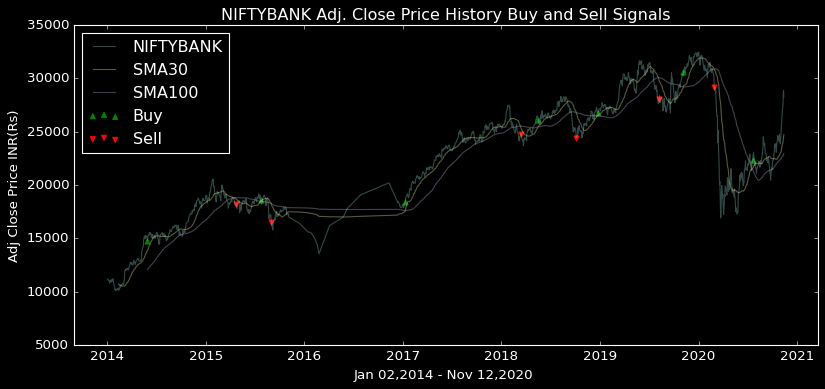

In [25]:
plt.style.use('dark_background') 
plt.figure(figsize=(12,5))
plt.plot(df['NIFTYBANK'], label='NIFTYBANK', alpha=0.35)
plt.plot(df['SMA30'], label='SMA30', alpha=0.35)
plt.plot(df['SMA100'],label='SMA100', alpha=0.35)
plt.scatter(df.index, df['Buy Signal Price'], label ='Buy', marker='^',color='green')
plt.scatter(df.index, df['Sell Signal Price'],label='Sell', marker='v', color='red')
plt.title('NIFTYBANK Adj. Close Price History Buy and Sell Signals')
plt.xlabel("Jan 02,2014 - Nov 12,2020 ")
plt.ylabel("Adj Close Price INR(Rs)")
plt.legend(loc="upper left")
plt.show()